In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import ast
from pickle import load

from os.path import basename

from json import dumps 
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
sns.set()
sns.set(font_scale=1.5)


%matplotlib inline

plt.rcParams['figure.figsize'] = (7,15)
%config InlineBackend.figure_format = 'retina'

In [2]:
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    print(array_string)
    return np.array(ast.literal_eval(array_string))

# Plotting "Coefficient" Summary Plots
We'll create a function to plot, for a single dataset, the top *N* coefficients in magnitude for all methods. We'll chain them together to create the figure for the paper. 

In [3]:
resultdir = "new_runs_poly/Swiss-Alpine-Plants-2019-10-28_18:45:18"
resultroot = '-'.join(basename(resultdir).split("-")[:3])
print(resultroot)

Swiss-Alpine-Plants


In [11]:
coefs_df = pd.read_csv('{}/{}-coefs.csv'.format(resultdir, resultroot), index_col = 0)
all_coefs = np.load('{}/{}-all_coefs.npy'.format(resultdir, resultroot))
trait_names = list(pd.read_csv("{}/{}-traitnames.csv".format(resultdir, resultroot), index_col = 0, header=None).index)
trait_mean_rank = np.load("{}/{}-mean-rank-trait-order.npy".format(resultdir, resultroot))

In [12]:
np.array(trait_names)[trait_mean_rank]

array(['oceanity_o', 'nichebreadth_amplit_ocean', 'Nbound_lat_GBIF_nosyn',
       'Ave_seed_shed_ht_m', 'dispersal_mode_gravity', 'StorageOrgan',
       'seed_shed_dur_mos', 'flwr_dur_mos', 'diaspore_mass_mg', 'GenTime',
       'flwr_mo_start', 'flwr_mo_end', 'latest_seed_shed_mo',
       'diaspore_ave_len_mm', 'oceanity_ks', 'oceanity_sks',
       'ReprModeCode', 'MaxAlt', 'diaspore_max_len_mm',
       'Min_seed_shed_ht_m', 'BreedSysCode_4.0', 'seed_mass_mg',
       'SI01_0.0', 'dispersal_mode_wind', 'Resil', 'oceanity_os',
       'diaspore_min_len_mm', 'BreedSysCode_1.0', 'dispersal_mode_animal',
       'nichebreadth_num_flor_zones', 'SI01_1.0', 'dispersal_mode_water',
       'BreedSysCode_3.0', 'earliest_seed_shed_mo', 'Max_seed_shed_ht_m',
       'oceanity_sos', 'oceanity_so', 'BreedSysCode_2.0'], 
      dtype='<U27')

In [13]:
modelOrder = ["OLS", "Ridge", "Kernel Ridge", "RF", "SVR"]

coefs_by_trait = np.moveaxis(all_coefs, 2, 0)
dfs = []
for data in coefs_by_trait:
    dfs.append(pd.concat([pd.DataFrame({m : [data[i, :]]}) for i, m in enumerate(modelOrder)], axis=1))
    
merged = pd.concat(dfs)
merged.index = trait_names
merged = merged.loc[coefs_df.index]

coefs_df = coefs_df.iloc[:10]
coefs_df = coefs_df[modelOrder]
coefs_df = coefs_df.iloc[::-1] # not sure why but it seems like it needs to be reversed for plotting to work right?

In [14]:
def coefsSubplot(coefs, method, ax, labels=None):
    """
        create a horizontal barplot with <coefs> on the Y axis for given method.
    """
    bar_indices = np.arange(len(coefs))
    
    for b in bar_indices + 1:
        if b % 2:
            ax.axhspan(b-0.5, b+0.5, alpha=0.2)
    
    ax.axvline(0, color='black', linestyle = '--')
    
    ax.barh(bar_indices,
             coefs,
             align='center', color='#4b2e83')
    
  
    if labels is not None:
        ax.set_yticks(bar_indices)
        ax.set_yticklabels(labels)
    else:
        ax.set_yticklabels([])
    ax.set_title(method)


In [15]:
sns.set_style("white")

def dataset_coefplot(dataset_coefs, ax = None, title=None):
    """
        create set of horizontal barplots, one for each method, for a given dataset. (return axis upon which it was plotted)
    """

    if ax is None:
        fig, ax = plt.subplots(nrows = 1,
                                 ncols = len(dataset_coefs.columns), 
                                 sharey = True, 
                                 figsize=(20,5))
    for i, c in enumerate(dataset_coefs.columns):
        if (i == 0):
            print(dataset_coefs.index)
            coefsSubplot(dataset_coefs[c].values, c, ax[i], labels=list(dataset_coefs.index))
        else: 
            coefsSubplot(dataset_coefs[c].values, c, ax[i], labels=None)

    if title is not None and ax is None:
        fig.suptitle(title, x=-0.05, y=0.92, fontsize=16, weight='bold')
    if title is not None and ax is not None:
        ax[0].suptitle(title, x=-0.05, y=0.92, fontsize=16, weight='bold')
    return axes

**testing**

Index(['seed_mass_mg', 'MaxAlt', 'latest_seed_shed_mo', 'diaspore_ave_len_mm',
       'BreedSysCode_2.0', 'seed_shed_dur_mos', 'diaspore_max_len_mm',
       'diaspore_min_len_mm', 'nichebreadth_num_flor_zones',
       'earliest_seed_shed_mo'],
      dtype='object', name='index')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67e5d39cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f67e6f1d8d0>]], dtype=object)

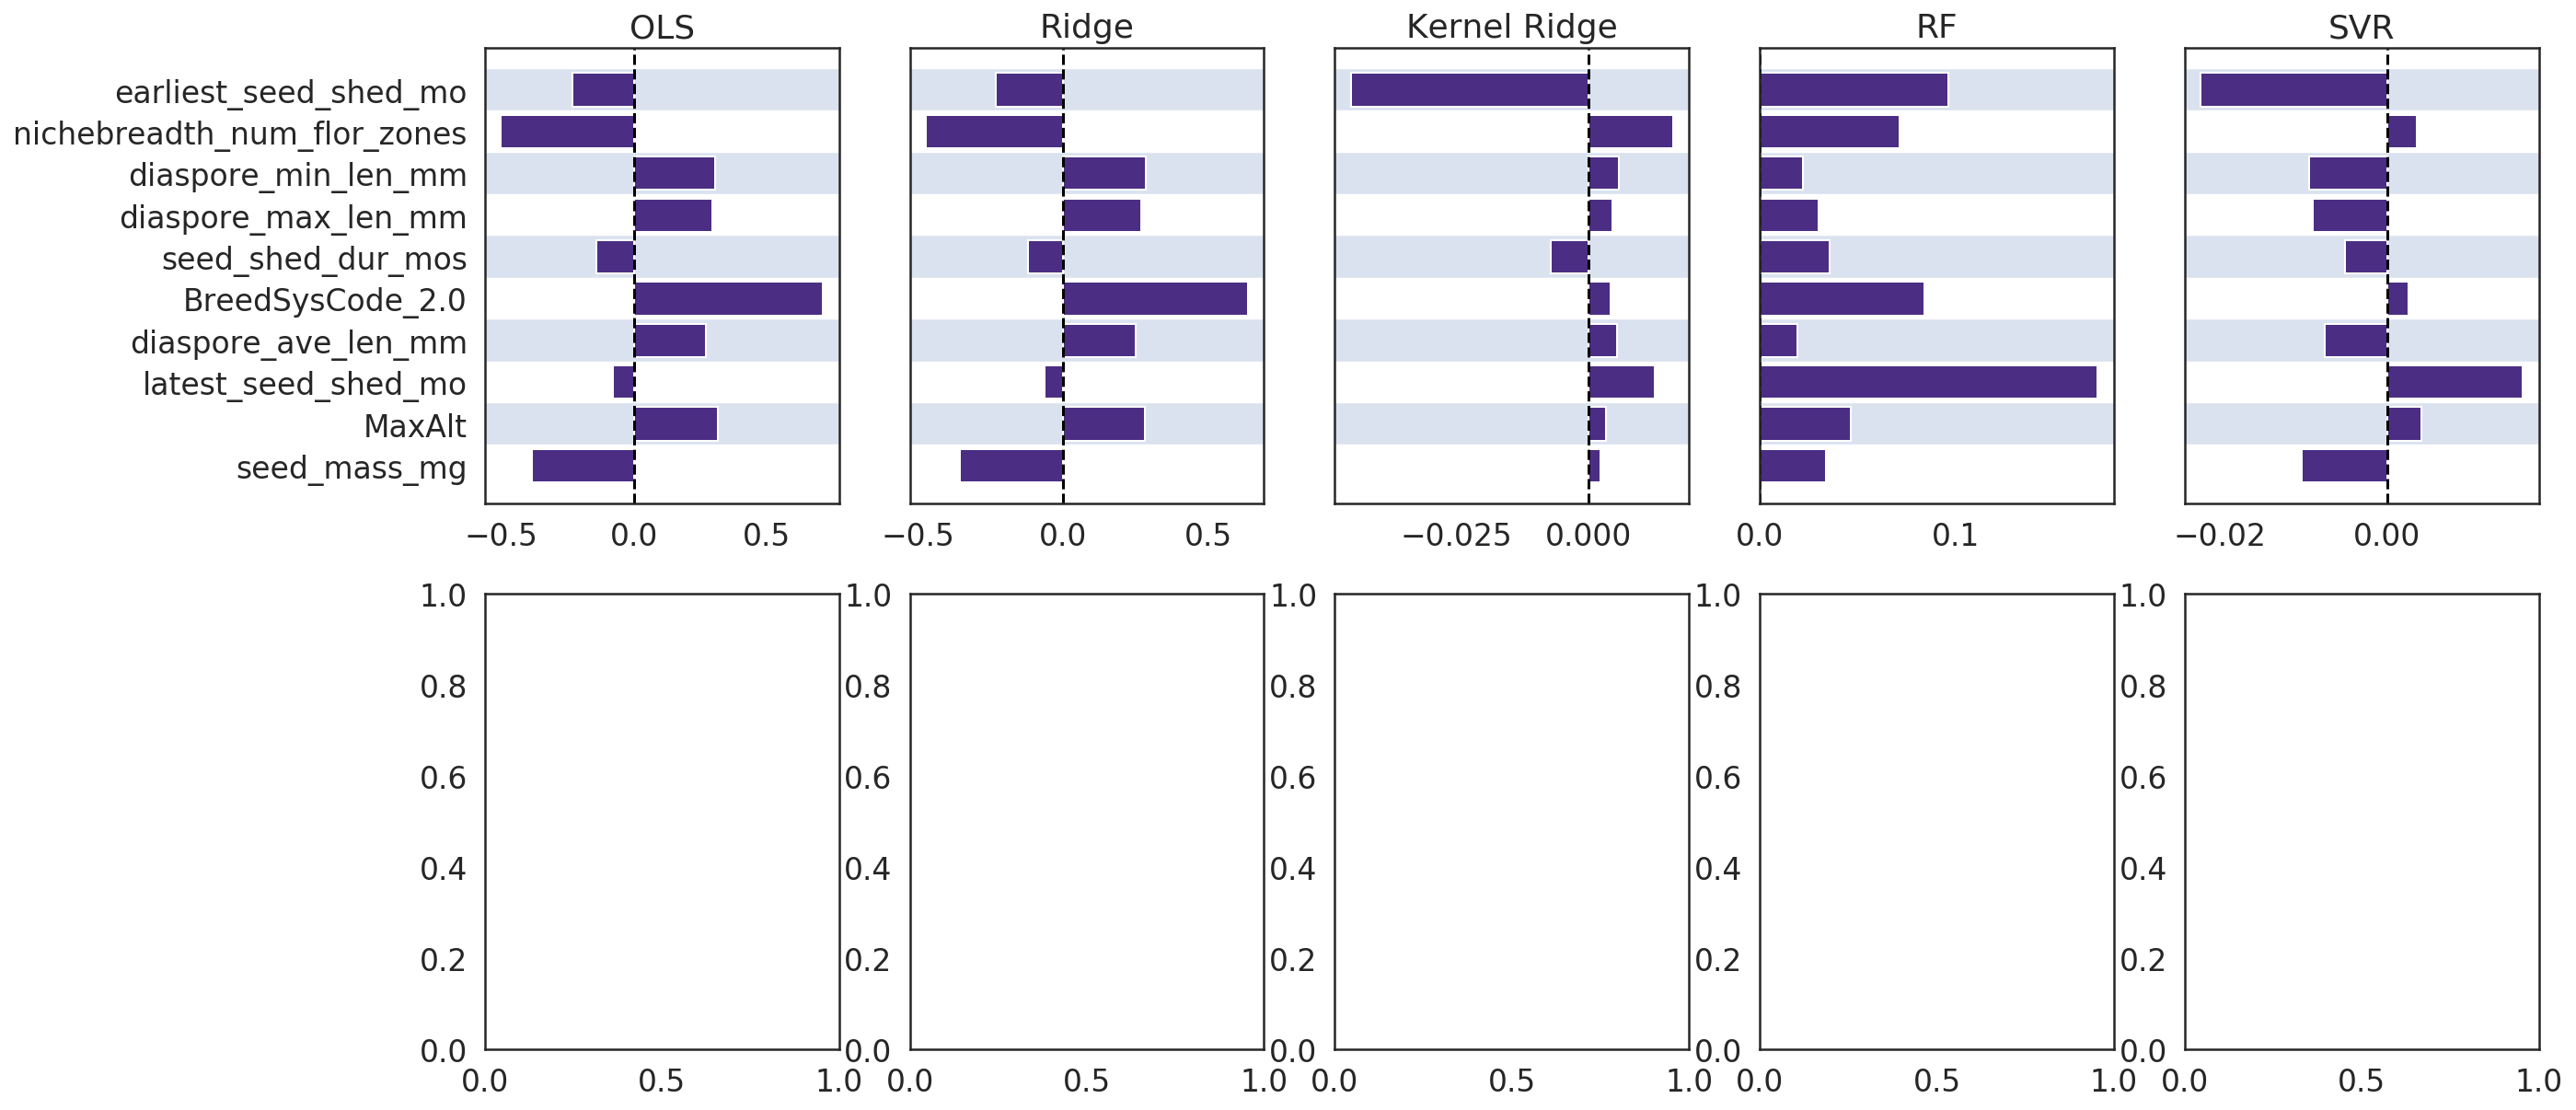

In [16]:
fig, axes = plt.subplots(ncols = 5, nrows = 2, figsize=(20, 10))
dataset_coefplot(coefs_df, ax=axes[0])
# dataset_coefplot(ds2, ax = axes[1])

In [17]:
coefs_by_trait = np.moveaxis(all_coefs, 2, 0)
modelTypes = ('OLS', 'Ridge', 'Kernel Ridge', 'RF', 'SVR')
dfs = []
for data in coefs_by_trait:
    dfs.append(pd.concat([pd.DataFrame({m : [data[i, :]]}) for i, m in enumerate(modelTypes)], axis=1))
    
merged = pd.concat(dfs)
merged.index = trait_names
merged = merged.loc[coefs_df.index]


In [18]:
scalers = {}
for model in modelOrder:
    scalers[model] = MinMaxScaler(feature_range=(-1, 1))
    scalers[model].fit(np.stack(merged[model].values).flatten().reshape(-1, 1))

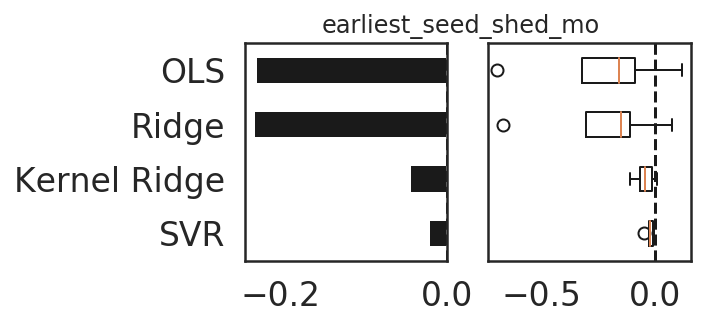

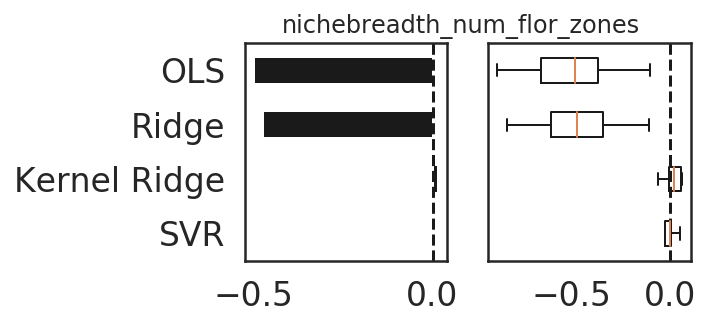

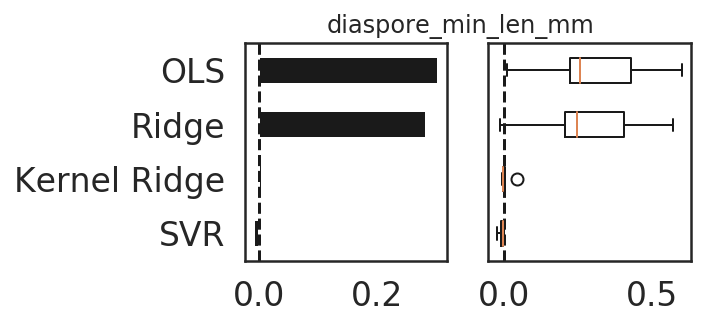

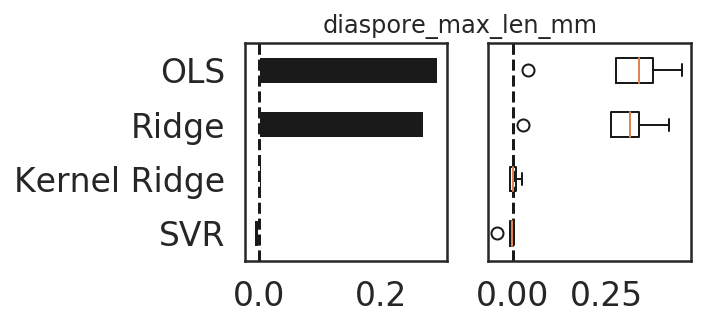

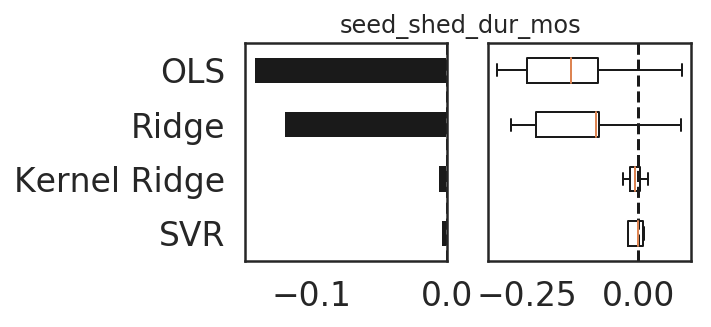

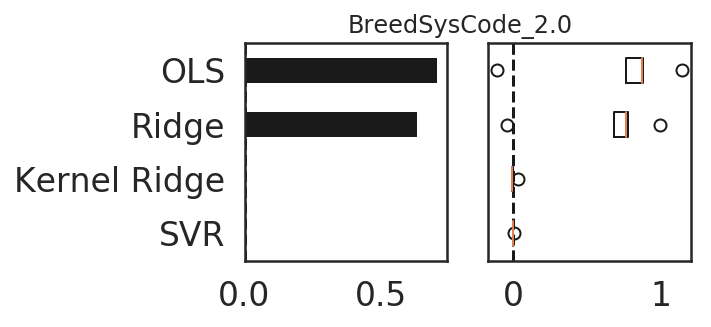

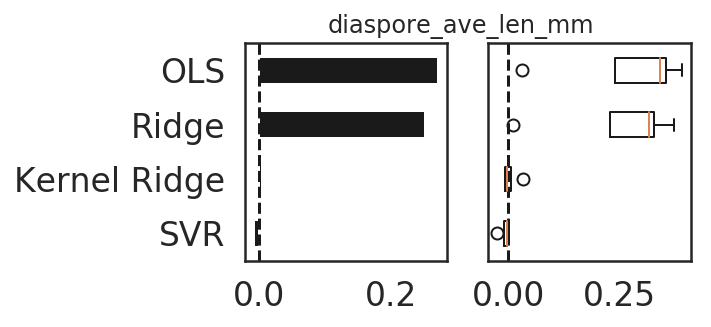

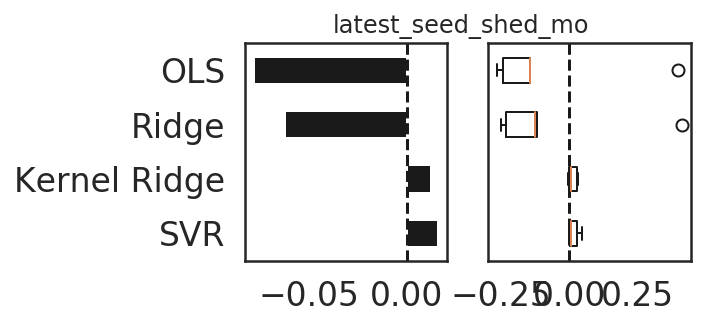

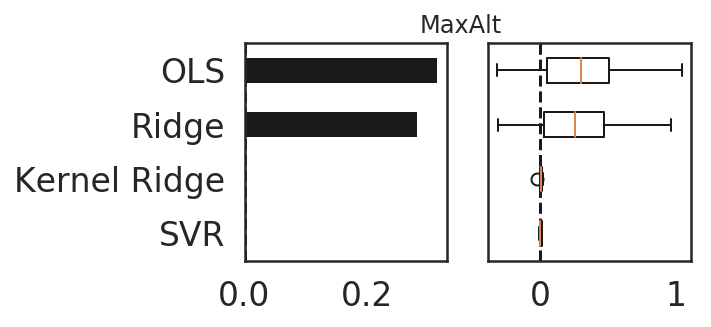

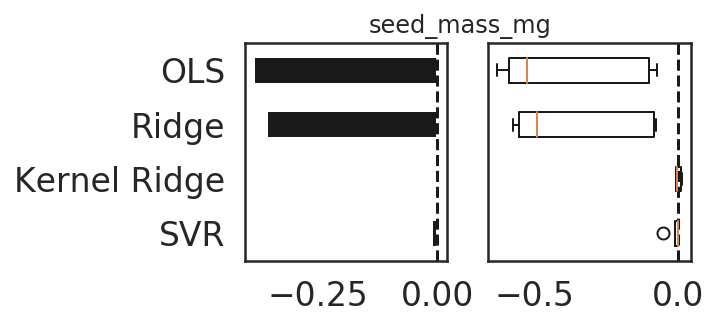

In [33]:
meanCoefs_noRF = coefs_df.drop("RF", axis=1)
allCoefs_noRF = merged.drop("RF", axis = 1)

for i, row in enumerate(meanCoefs_noRF.index[::-1]):
    fig, ax = plt.subplots(1, 2, figsize=(4,2))
    fig.suptitle(row)

#     means_scaled = [scalers[i].transform(np.array([d]).reshape(1, -1)) for i, d in meanCoefs_noRF.loc[row][::-1].items()]
#     alls_scaled = [scalers[i].transform(np.array([d]).reshape(1, -1)) for i, d in allCoefs_noRF.loc[row][::-1].items()]

    meanCoefs_noRF.loc[row][::-1].plot(kind='barh',
                                       ax = ax[0], color='k')
    ax[0].axvline(0, linestyle='--', color='k')

    alls = np.stack(allCoefs_noRF.loc[row][::-1].values) 
    ax[1].axvline(0, linestyle='--', color='k')

    ax[1].boxplot(alls.T, vert=False)
    ax[1].set_yticks([])
    
#     ax[2].barh(range(len(means_scaled)), np.stack(means_scaled).squeeze(), height=0.5)
#     ax[2].axvline(0, linestyle='--', color='k')
#     ax[2].set_xlim(-1, 1)

    
#     ax[3].boxplot(np.stack(alls_scaled).squeeze().T, vert=False)
#     ax[3].axvline(0, linestyle='--', color='k')
#     ax[3].set_xlim(-1,1)


    plt.show()
    

---
## Chain Them Together

In [9]:
# datasets = [
#     "../plots/TRY/TRY-rumpfdata-coefs.csv", 
#     "../plots/plants5-extendedDrop/Alpine-Plants-extendeddrop-coefs.csv", 
#     "../plots/mammals-extendeddrop/Mammals-extendeddrop-coefs.csv",
#     "../plots/marine-extendeddrop/triennialMarineData-extendeddrop-coefs.csv", 
# ]
datasets = [
    "new_runs_poly/European-Plants-2019-10-28_19:45:33/European-Plants-coefs.csv", 
    "new_runs_poly/Swiss-Alpine-Plants-2019-10-28_18:45:18/Swiss-Alpine-Plants-coefs.csv",
    "new_runs_poly/Mammals-2019-10-29_00:29:14/Mammals-coefs.csv",
    "new_runs_poly/Triennial-Marine-Survey-2019-10-28_22:41:57/Triennial-Marine-Survey-coefs.csv"
]

new_runs_poly/European-Plants-2019-10-28_19:45:33/European-Plants-coefs.csv
Index(['LifeStrategy_ccs', 'LifeStrategy_rrs', 'LifeStrategy_ccc', 'LifeSpan',
       'TerminalVelocity', 'RelativeAbundance', 'NutrientIndicator',
       'SeedReleaseHeight', 'LifeStrategy_crs', 'TemperatureIndicator'],
      dtype='object', name='index')
0
new_runs_poly/Swiss-Alpine-Plants-2019-10-28_18:45:18/Swiss-Alpine-Plants-coefs.csv
Index(['seed_mass_mg', 'MaxAlt', 'latest_seed_shed_mo', 'diaspore_ave_len_mm',
       'BreedSysCode_2.0', 'seed_shed_dur_mos', 'diaspore_max_len_mm',
       'diaspore_min_len_mm', 'nichebreadth_num_flor_zones',
       'earliest_seed_shed_mo'],
      dtype='object', name='index')
1
new_runs_poly/Mammals-2019-10-29_00:29:14/Mammals-coefs.csv
Index(['Rhythm: Diurnal + Nocturnal (binary)', 'Rhythm: Nocturnal (binary)',
       'Mass (g)', 'Facultative Hibernation (binary) ', 'Range Size (km2)',
       'Young / year', 'Litters / year', 'BioClim: Bio 1 (std dev)',
       'Longevity

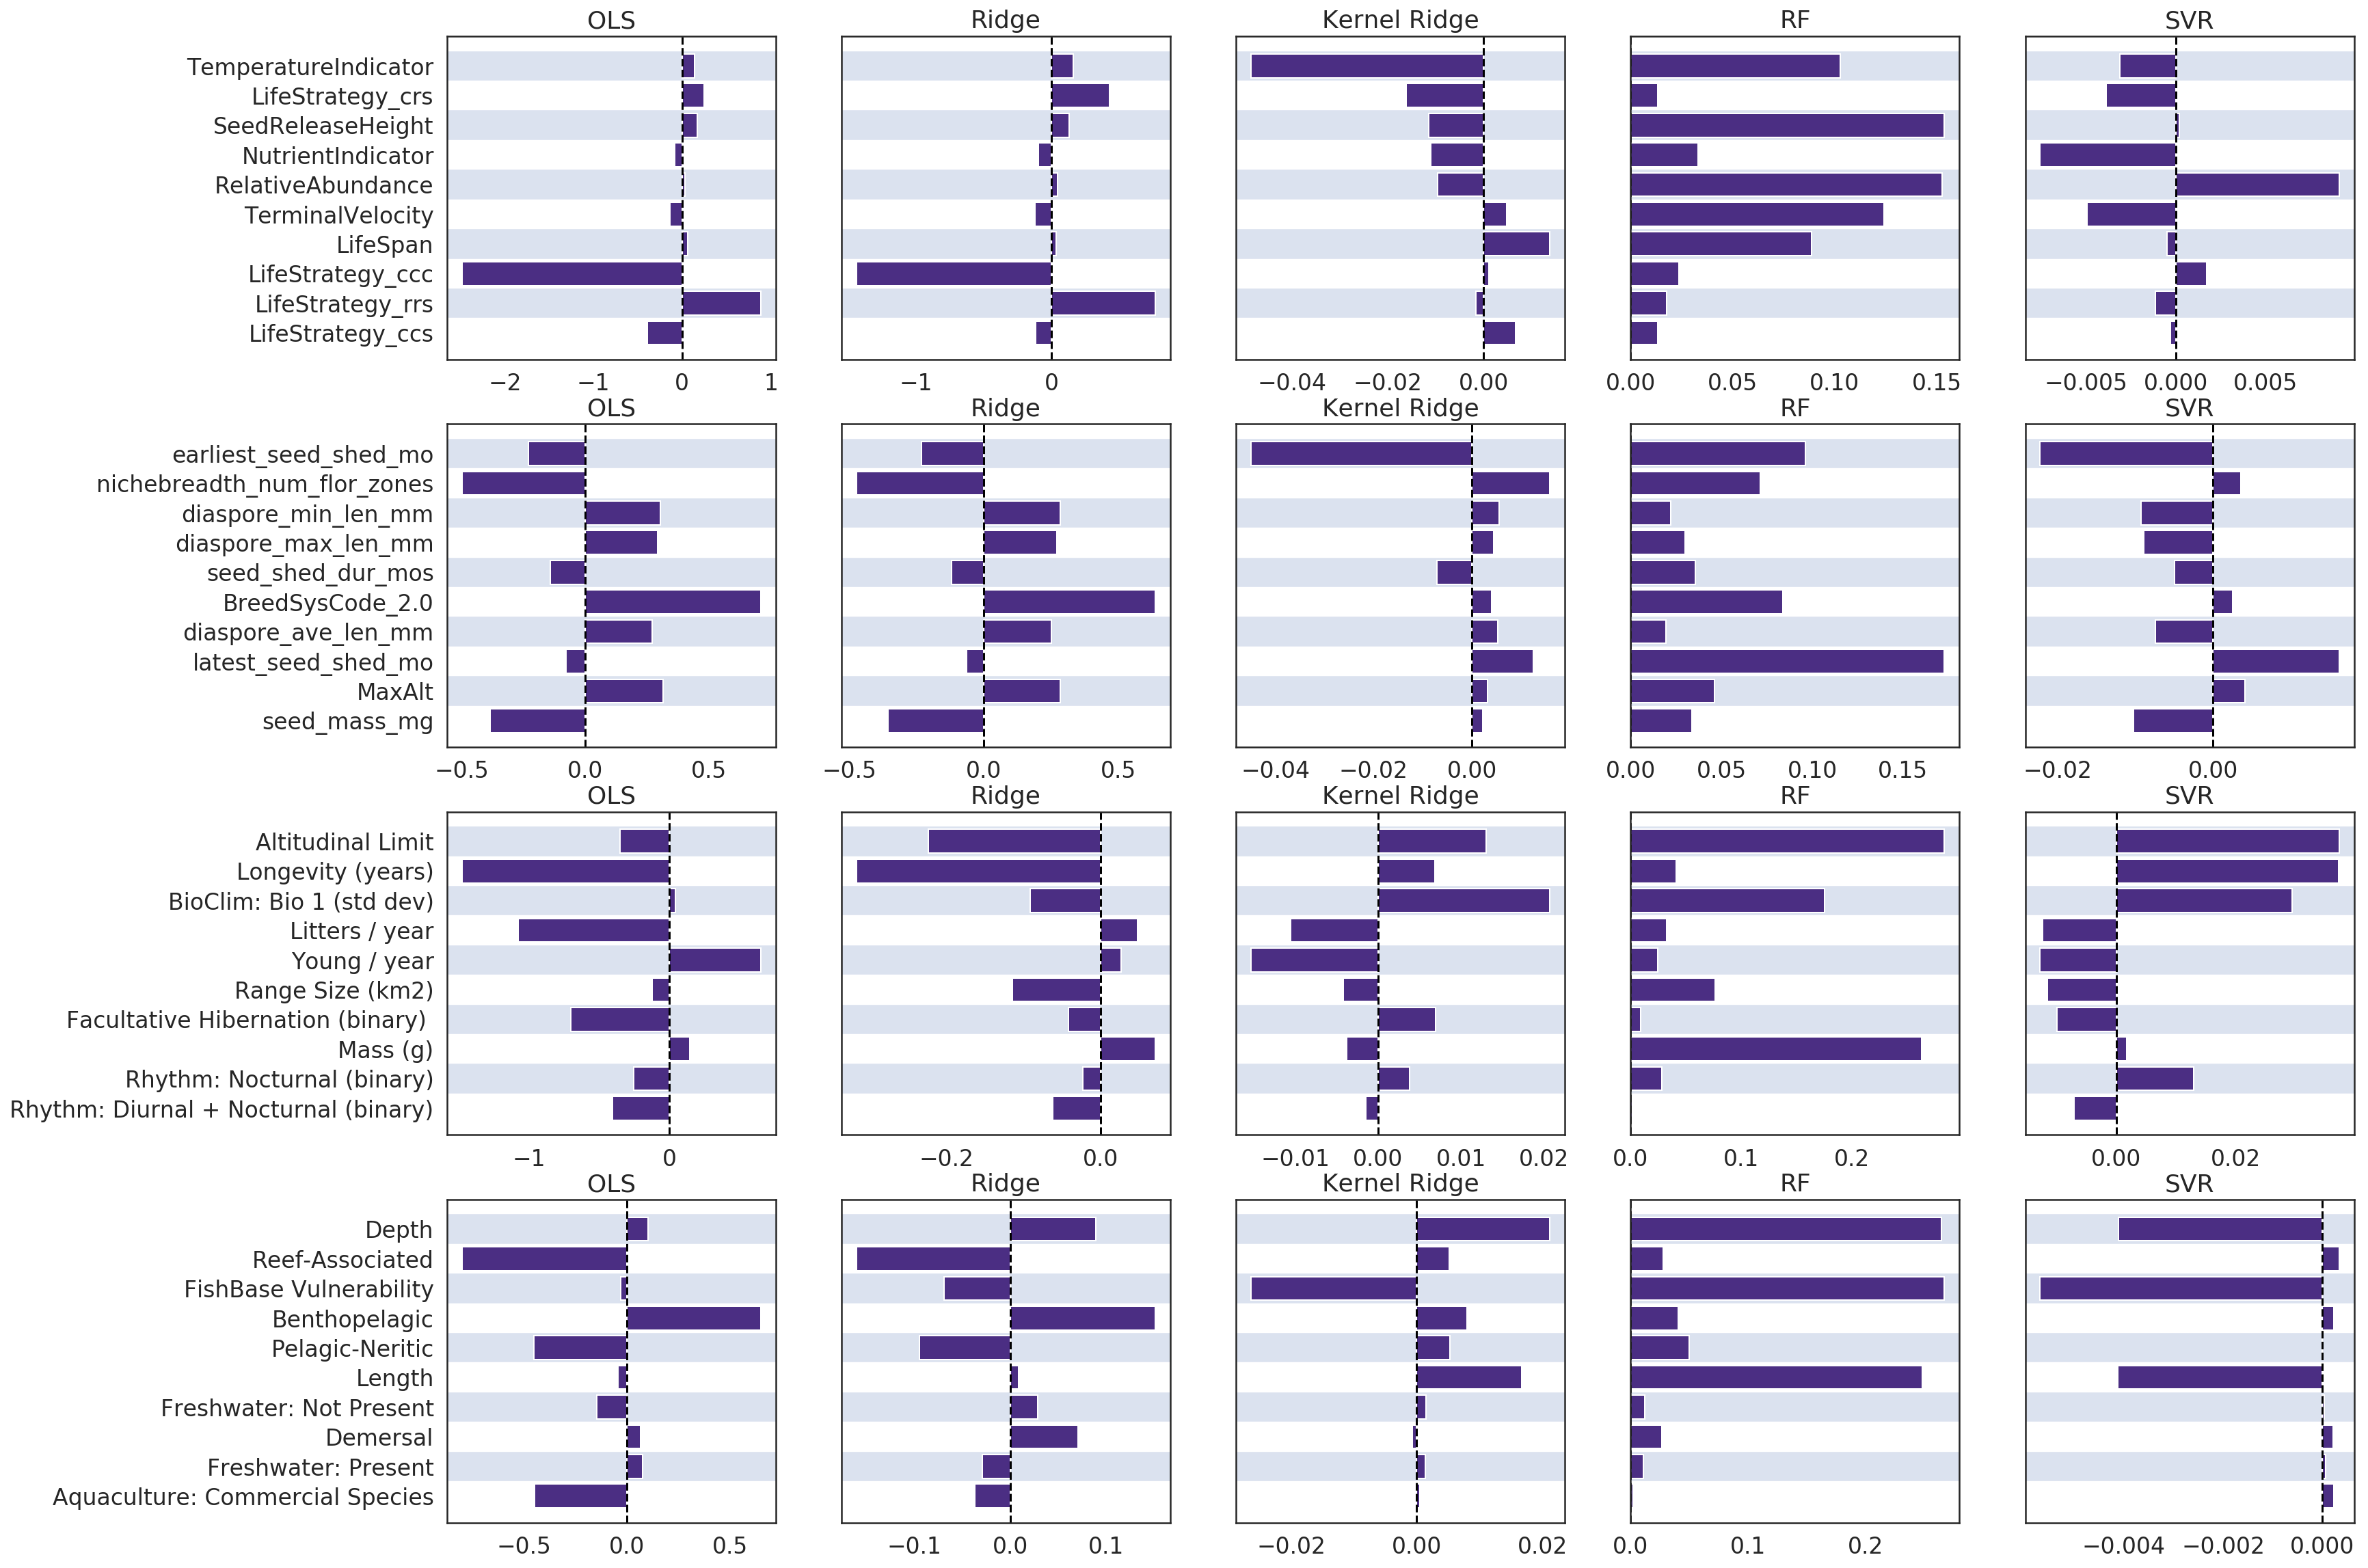

In [10]:
fig, axes = plt.subplots(ncols = 5, nrows = len(datasets), figsize=(25, 20))

for i, ds in enumerate(datasets):
    print(ds)
    coefs_df = pd.read_csv(ds, index_col = 0)
    coefs_df = coefs_df.iloc[:10]
    coefs_df = coefs_df[["OLS", "Ridge", "Kernel Ridge", "RF", "SVR"]]
    coefs_df = coefs_df.iloc[::-1] # not sure why but it seems like it needs to be reversed for plotting to work right?
    dataset_coefplot(coefs_df, ax=axes[i])
    print(i)

plt.savefig("merged_test.png")
plt.show()


The figure present in the manuscript will need to be adjusted in photo-editing tools. 

FileNotFoundError: File b'../plots/TRY/TRY-rumpfdata-coefs.csv' does not exist

In [11]:
datasets = [
    "../plots/boxplot-reruns-dec18/Swiss Alpine Plants/Swiss-Alpine-Plants-rank.csv", 
    "../plots/boxplot-reruns-dec18/Triennial Marine Survey/Triennial-Marine-Survey-rank.csv", 
]

In [18]:
coefs = []
for i, ds in enumerate(datasets):
    coefs_df = pd.read_csv(ds, index_col = 0)
    coefs.append(coefs_df)
    

coefs

[                             OLS  Ridge  Kernel Ridge  Kernel Ridge.1  RF  \
 StorageOrgan                  12     13            26              26  23   
 ReprModeCode                   7     24            15              15  18   
 flwr_mo_start                 26     33            22              22  14   
 flwr_mo_end                   22     30             4               4  35   
 flwr_dur_mos                  32     31             5               5   9   
 earliest_seed_shed_mo         13      0            14              14   0   
 latest_seed_shed_mo           25      3             1               1   3   
 seed_shed_dur_mos             15     23             2               2  13   
 seed_mass_mg                   3     17            13              13  21   
 diaspore_mass_mg              31     32            32              32  22   
 diaspore_min_len_mm           10      4            12              12  25   
 diaspore_max_len_mm            8     10            31          

In [34]:
np.cov(coefs[0].values).shape

(38, 38)

In [189]:
coefs

NameError: name 'coefs' is not defined